In [ ]:
# TRAIN ENSEMBLE MODELS - DATASET_VERSION_1
import sys
import pandas as pd
from utils.preprocess import get_data_generators
from ai_models.ensemble_model import run_ensemble_model
sys.path.append(r'D:\skin_disease_detection\backend\app')

# Prepare data generators
train_generator, validation_generator, test_generator, label_encoder, class_weights = get_data_generators()

# Run the ensemble model
run_ensemble_model(train_generator, validation_generator, test_generator, class_weights)

In [ ]:
# TRAIN EFFICIENTNETB3 MODEL - DATASET_VERSION_1
import sys
import pandas as pd
from utils.preprocess import get_data_generators
from ai_models.efficientnet_model import train_efficientnetb3, evaluate_model
sys.path.append(r'D:\skin_disease_detection\backend\app')

# Load data generators
train_gen, val_gen, test_gen, label_enc, class_wts = get_data_generators()

# Train EfficientNetB3
model, history = train_efficientnetb3(train_gen, val_gen, class_wts)

# Evaluate on Test Set
evaluate_model(model, test_gen)


In [ ]:
# TRAIN EFFICIENTNETB3 MODEL - DATASET_VERSION_2
import sys
import pandas as pd
from utils.preprocess_2 import get_data_generators
from ai_models.efficientnet_model import train_efficientnetb3, evaluate_model
sys.path.append(r'D:\skin_disease_detection\backend\app')

# Load data generators
train_generator, validation_generator, test_generator, class_weights = get_data_generators()

# Train EfficientNetB3
model, history = train_efficientnetb3(train_generator, validation_generator, class_weights)

# Evaluate on Test Set
evaluate_model(model, test_generator)

In [ ]:
# TRAIN EFFICIENTNETB3 MODEL - DATASET_VERSION_3
import sys
import pandas as pd
from utils.preprocess_3 import get_data_generators
from ai_models.efficientnet_model import train_efficientnetb3, evaluate_model
sys.path.append(r'D:\skin_disease_detection\backend\app')

# Load data generators
train_generator, validation_generator, test_generator, class_weights = get_data_generators()

# Train EfficientNetB3
model, history = train_efficientnetb3(train_generator, validation_generator, class_weights)

# Evaluate on Test Set
evaluate_model(model, test_generator)

In [ ]:
# TRAIN DENSENET121 MODEL - DATASET-VERSION-3
import sys
import pandas as pd
from utils.preprocess_3 import get_data_generators
from ai_models.densenet121_model import train_densenet121_model, evaluate_densenet121_model
sys.path.append(r'D:\skin_disease_detection\backend\app')

# Load data generators
train_generator, validation_generator, test_generator, class_weights = get_data_generators()

# Train densenet model
model, history = train_densenet121_model(train_generator, validation_generator, class_weights)

# Evaluate on Test Set
evaluate_densenet121_model(model, test_generator)

In [ ]:
# TRAIN RESNET50 MODEL - DATASET-VERSION-3
import sys
import pandas as pd
from utils.preprocess_3 import get_data_generators
from ai_models.resnet50_model import train_resnet50, evaluate_model
sys.path.append(r'D:\skin_disease_detection\backend\app')

# Load data generators
train_generator, validation_generator, test_generator, class_weights = get_data_generators()

# Train resnet model
model, history = train_resnet50(train_generator, validation_generator, class_weights)

# Evaluate on Test Set
evaluate_model(model, test_generator)

c:\Users\Purve\anaconda3\envs\skn-dis-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



🔄 Loading training, validation, and test data...

⚖️ Computing class weights for training data...
Class weights computed: {0: np.float64(4.37305053025577), 1: np.float64(2.7817460317460316), 2: np.float64(1.3022478172023035), 3: np.float64(12.36331569664903), 4: np.float64(1.285530900421786), 5: np.float64(0.21338772031292808), 6: np.float64(10.115440115440116)}

📊 Class distribution in Training Set:
  Class 0: 229 images
  Class 1: 360 images
  Class 2: 769 images
  Class 3: 81 images
  Class 4: 779 images
  Class 5: 4693 images
  Class 6: 99 images


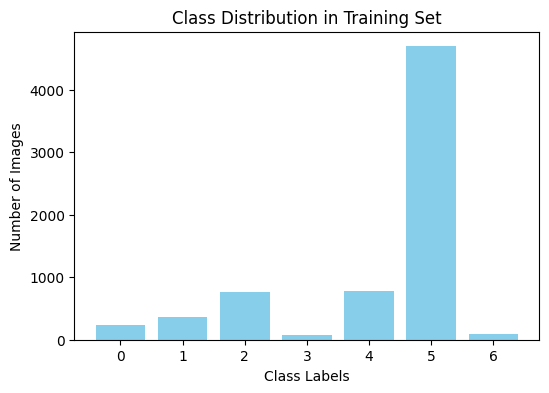


📊 Class distribution in Validation Set:
  Class 0: 65 images
  Class 1: 103 images
  Class 2: 220 images
  Class 3: 23 images
  Class 4: 222 images
  Class 5: 1341 images
  Class 6: 29 images


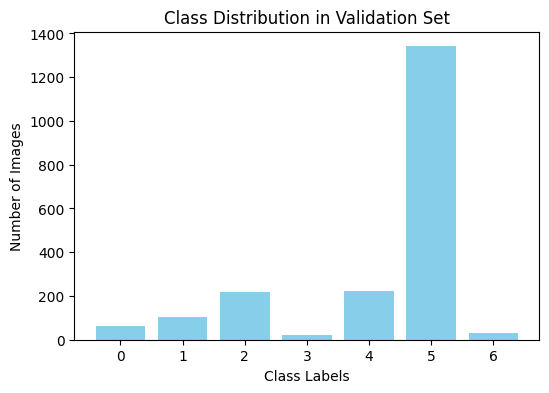


📊 Class distribution in Test Set:
  Class 0: 33 images
  Class 1: 51 images
  Class 2: 110 images
  Class 3: 11 images
  Class 4: 112 images
  Class 5: 671 images
  Class 6: 14 images


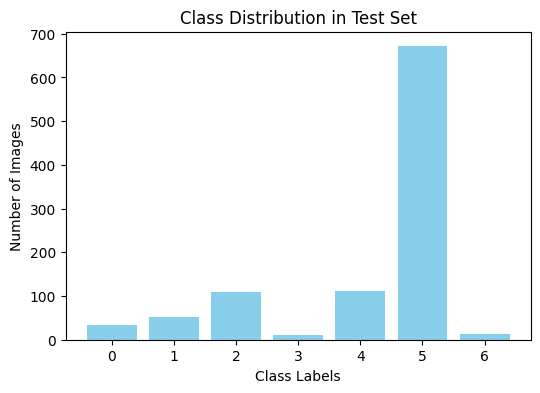


✅ Data generators created successfully!


c:\Users\Purve\anaconda3\envs\skn-dis-env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 822s 7s/step - accuracy: 0.1457 - loss: 3.1991 - val_accuracy: 0.2621 - val_loss: 2.0341
Epoch 2/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 423s 4s/step - accuracy: 0.2498 - loss: 2.0191 - val_accuracy: 0.3714 - val_loss: 1.9254
Epoch 3/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 599s 5s/step - accuracy: 0.2918 - loss: 1.8023 - val_accuracy: 0.4049 - val_loss: 1.9487
Epoch 4/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 428s 4s/step - accuracy: 0.3388 - loss: 1.6487 - val_accuracy: 0.4194 - val_loss: 1.9923
Epoch 5/25
110/110 ━━━━━━━━━━━━━━━━━━━━ 428s 4s/step - accuracy: 0.3642 - loss: 1.5228 - val_accuracy: 0.4438 - val_loss: 1.9755


Model saved at: ../../trained_models/resnet101.h5
16/16 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step

########## CLASSIFICATION REPORT ##########
              precision    recall  f1-score   support

       akiec       0.12      0.61      0.20        33
         bcc       0.18      0.57      0.27        51
         bkl       0.31      0.21      0.25       110
          df       0.05      0.45      0.08        11
         mel       0.35      0.35      0.35       112
          nv       0.95      0.40      0.56       671
        vasc       0.11      0.79      0.19        14

    accuracy                           0.39      1002
   macro avg       0.30      0.48      0.27      1002
weighted avg       0.73      0.39      0.47      1002


########## CONFUSION MATRIX ##########
[[ 20  11   0   0   2   0   0]
 [  9  29   1   5   1   1   5]
 [ 29  26  23   9  11   3   9]
 [  0   3   1   5   0   0   2]
 [ 31  13  10   5  39   9   5]
 [ 75  76  40  86  59 266  69]
 [  1   2   0   0   0   0  11]]


In [1]:
# TRAIN RESNET101 MODEL - DATASET-VERSION-3
import sys
import pandas as pd
from utils.preprocess_4 import get_data_generators
from ai_models.resnet101_model import train_resnet101, evaluate_model
sys.path.append(r'D:\skin_disease_detection\backend\app')

# Load data generators
train_generator, validation_generator, test_generator, class_weights = get_data_generators()

# Train resnet101 model
model, history = train_resnet101(train_generator, validation_generator, class_weights)

# Evaluate on Test Set
evaluate_model(model, test_generator)

In [ ]:
# TRAINING SINGLE CUSTOM-CNN MODEL
import sys
import pandas as pd
from utils.preprocess import get_data_generators
from ai_models.cnn_model import train_custom_cnn, evaluate_model
sys.path.append(r'D:\skin_disease_detection\backend\app')

# Load data generators
train_generator, validation_generator, test_generator, label_encoder, class_weights = get_data_generators()

# Train the model
model, history = train_custom_cnn(train_generator, validation_generator)

# Evaluate on validation set
evaluate_model(model, test_generator)

In [ ]:
# CHECKING ENSEMBLE MULTI-MODEL PREDICTIONS
import sys
import numpy as np
from tensorflow.keras.models import load_model
from joblib import load
from tensorflow.keras.preprocessing.image import load_img, img_to_array

sys.path.append(r'D:\skin_disease_detection\trained_models')

# Load base models
resnet_model = load_model(r"D:\skin_disease_detection\trained_models\ResNet50_model.h5")
print("ResNet50 model loaded successfully!")
efficientnet_model = load_model(r"D:\skin_disease_detection\trained_models\EfficientNetB0_model.h5")
print("EfficientNet model loaded successfully!") 
densenet_model = load_model(r"D:\skin_disease_detection\trained_models\DenseNet121_model.h5")
print("DenseNet model loaded successfully!")

# Load meta-model
meta_model = load(r"D:\skin_disease_detection\trained_models\meta_model.pkl")
print("Meta-model loaded successfully!")

# Load an image
image_path = r"D:\skin_disease_detection\backend\data\Ham10000\HAM10000_images_part_2\ISIC_0029360.jpg"
img = load_img(image_path, target_size=(224, 224))  # Resize as per model input size
print(img)

# Preprocess the image
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Convert single image to batch
img_array = img_array / 255.0 

# Get predictions from the base models
resnet_pred = resnet_model.predict(img_array)
efficientnet_pred = efficientnet_model.predict(img_array)
densenet_pred = densenet_model.predict(img_array)

print("ResNet50 Prediction:", resnet_pred)
print("EfficientNet Prediction:", efficientnet_pred)
print("DenseNet Prediction:", densenet_pred)

# Combine predictions for the meta-model
base_predictions = np.array([resnet_pred, efficientnet_pred, densenet_pred]).reshape(1, -1)

# Get the final prediction from the meta-model
meta_prediction = meta_model.predict(base_predictions)
print("Meta-Model Final Prediction:", meta_prediction)

In [ ]:
# CHECKING SINGLE-MODEL EFICIENTNETB3 PREDICTIONS - WORST
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image

# Load the trained model
MODEL_PATH = r'D:\skin_disease_detection\trained_models\efficientnetb3.h5'  # Update as needed
model = tf.keras.models.load_model(MODEL_PATH)

# Define class labels (ensure these match your training labels)
class_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']  # Confirm correct order

def preprocess_image(image_path, target_size=(224, 224)):
    """Preprocess an image for model prediction."""
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize
    return img_array

def predict_skin_disease(image_path):
    """Predict skin disease and print detailed output."""
    img_array = preprocess_image(image_path)
    
    # Get raw predictions
    predictions = model.predict(img_array)
    
    # Print softmax probabilities for debugging
    print("\n########## SOFTMAX PROBABILITIES ##########")
    for i, prob in enumerate(predictions[0]):
        print(f"{class_labels[i]}: {prob:.4f}")

    # Get most likely class
    predicted_class = np.argmax(predictions)  
    confidence = np.max(predictions)  

    # Map to class label
    predicted_label = class_labels[predicted_class]

    print(f"\nPredicted Class: {predicted_label} (Confidence: {confidence:.2f})")

# Test with a real image
TEST_IMAGE_PATH = r'D:\skin_disease_detection\backend\own_data\base_dir\test_dir\df\ISIC_0024330.jpg' # Update as needed
predict_skin_disease(TEST_IMAGE_PATH)


In [ ]:
# TESTNG MODEL PREDICTIONS ON A SINGLE IMAGE
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import preprocess_input

# Optionally, if you have a mapping from indices to class names:
# Replace the dictionary below with your actual class mapping.
class_indices = {
    "akiec": 0,
    "bcc": 1,
    "bkl": 2,
    "df": 3,
    "mel": 4,
    "nv": 5,
    "vasc": 6
}
# Reverse mapping from index to class name
idx2class = {v: k for k, v in class_indices.items()}

def load_and_preprocess_image(image_path, target_size=(224, 224)):
    """
    Loads an image from disk, converts it from BGR to RGB,
    resizes it to target_size, preprocesses it for EfficientNet,
    and expands dimensions to create a batch of size 1.
    """
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found or cannot be read: " + image_path)
    # Convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Resize image
    image = cv2.resize(image, target_size)
    # Preprocess using EfficientNet preprocessing function
    image = preprocess_input(image)
    # Expand dimensions to match the model's input (batch_size, height, width, channels)
    image = np.expand_dims(image, axis=0)
    return image

# Load your saved model
model_path = r"D:\skin_disease_detection\trained_models\resnet101.h5"  # Adjust path if needed
model = load_model(model_path)
print("Model loaded successfully.")

# Provide the path to your test image
image_path = r"D:\skin_disease_detection\backend\own_data\base_dir\test_dir\akiec\ISIC_0033084.jpg"  # Replace with your image file path

# Load and preprocess the image
input_image = load_and_preprocess_image(image_path, target_size=(224, 224))

# Make a prediction
predictions = model.predict(input_image)
predicted_index = np.argmax(predictions, axis=1)[0]
predicted_class = idx2class.get(predicted_index, str(predicted_index))
print("Predicted class index:", predicted_index)
print("Predicted class name:", predicted_class)

# Display the image along with its predicted label
orig_image = cv2.imread(image_path)
orig_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)
plt.imshow(orig_image)
plt.title(f"Predicted: {predicted_class}")
plt.axis("off")
plt.show()


In [ ]:
# MODEL EVALUATION
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import albumentations as A
import cv2
from collections import Counter
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications.efficientnet import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

# ✅ Step 1: Data Preprocessing & Custom Data Generator
class CustomDataGenerator(Sequence):
    def __init__(self, file_paths, labels, batch_size, transform=None, shuffle=True):
        self.file_paths = file_paths
        self.labels = labels
        self.batch_size = batch_size
        self.transform = transform
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.file_paths))
        self.classes = labels
        if self.shuffle:
            np.random.shuffle(self.indexes)
    
    def __len__(self):
        return math.ceil(len(self.file_paths) / self.batch_size)
    
    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_files = [self.file_paths[i] for i in indexes]
        batch_labels = [self.labels[i] for i in indexes]
        images = np.array([self.__load_image(f) for f in batch_files])
        return images, np.array(batch_labels)

    def __load_image(self, image_path):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        return preprocess_input(image)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

def create_val_transform(target_size=(224, 224)):
    height, width = target_size
    return A.Resize(height=height, width=width)

def get_data_generators(base_dir, target_size=(224, 224), batch_size=64):
    train_dir = os.path.join(base_dir, 'train_dir')
    val_dir = os.path.join(base_dir, 'val_dir')
    test_dir = os.path.join(base_dir, 'test_dir')

    classes = sorted(os.listdir(train_dir))
    class_indices = {cls: i for i, cls in enumerate(classes)}

    def load_images_labels(directory):
        file_paths = []
        labels = []
        for class_name in classes:
            class_path = os.path.join(directory, class_name)
            if os.path.isdir(class_path):
                for file in sorted(os.listdir(class_path)):
                    file_paths.append(os.path.join(class_path, file))
                    labels.append(class_indices[class_name])
        return np.array(file_paths), np.array(labels)
    
    _, _ = load_images_labels(train_dir)  # Not needed for testing
    _, _ = load_images_labels(val_dir)  # Not needed for testing
    test_files, test_labels = load_images_labels(test_dir)

    val_transform = create_val_transform(target_size)

    test_generator = CustomDataGenerator(
        test_files, test_labels, batch_size, transform=val_transform, shuffle=False
    )
    test_generator.class_indices = class_indices

    return test_generator, classes

# ✅ Step 2: Model Evaluation Function
def evaluate_model(model_path, test_generator, class_names):
    print(f"📂 Loading model from: {model_path}")
    model = load_model(model_path)
    print("✅ Model loaded successfully!\n")

    y_true, y_pred_prob = [], []

    for i in range(len(test_generator)):  # Iterate over all batches
        images, labels = test_generator[i]  # Get batch data
        y_true.extend(labels)
        preds = model.predict(images, verbose=0)
        y_pred_prob.extend(preds)

    y_true = np.array(y_true)
    y_pred_prob = np.array(y_pred_prob)

    if y_true.ndim > 1 and y_true.shape[1] > 1:
        y_true = np.argmax(y_true, axis=1)

    y_pred = np.argmax(y_pred_prob, axis=1)

    print("📜 Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    accuracy = np.mean(y_true == y_pred)
    print(f"\n✅ Test Accuracy: {accuracy:.4f}")

# ✅ Step 3: Load Test Generator & Evaluate
BASE_DIR = r'D:\\skin_disease_detection\\backend\\own_data\\base_dir'
MODEL_PATH = r"D:\skin_disease_detection\trained_models\densenet121.h5"

test_generator, class_names = get_data_generators(BASE_DIR)
evaluate_model(MODEL_PATH, test_generator, class_names)


In [ ]:
# Finde tuning trained model

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from utils.preprocess_3 import get_data_generators

train_generator, validation_generator, test_generator, class_weights = get_data_generators()

# Load the previously trained model
fine_tune_model_path = r"D:\skin_disease_detection\trained_models\resnet101.h5"
model = load_model(fine_tune_model_path)

# Unfreeze more layers in ResNet101 for fine-tuning (previously -40, now -100)
for layer in model.layers[-100:]:  # Fine-tuning deeper layers
    layer.trainable = True

# Define a much lower learning rate for fine-tuning
fine_tune_lr = 5e-6  
lr_schedule = ExponentialDecay(fine_tune_lr, decay_steps=5000, decay_rate=0.9, staircase=True)

# Compile the model with fine-tuning settings
model.compile(optimizer=Adam(learning_rate=lr_schedule), 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

# Define fine-tuning callbacks
callbacks = [
    EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
]

# Fine-tune the model for a few more epochs
fine_tune_epochs = 10  # Fine-tuning requires fewer epochs

history = model.fit(
    train_generator,
    epochs=fine_tune_epochs,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)

# Save the fine-tuned model
fine_tuned_model_path = "../../trained_models/resnet101_finetuned.h5"
model.save(fine_tuned_model_path)
print(f"Fine-tuned model saved at: {fine_tuned_model_path}")

# Evaluate fine-tuned model
def evaluate_model(model, test_generator):
    """
    Evaluates the model and prints classification report & confusion matrix.
    """
    test_preds = model.predict(test_generator)
    y_pred = np.argmax(test_preds, axis=1)
    y_true = test_generator.classes
    
    print("\n########## CLASSIFICATION REPORT ##########")
    print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))
    
    print("\n########## CONFUSION MATRIX ##########")
    print(confusion_matrix(y_true, y_pred))

# Run evaluation on test data
evaluate_model(model, test_generator)
